## Import Libraries

In [24]:
# importing the necessary libraries for this notebook to run and function properly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression

# Used for evauluate the 3 different models
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor

## Load the Data

In [2]:
iris = pd.read_csv('iris.csv')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## Visualization before Cleaning

In [5]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

We want to get a some kind of sense of the sepal width and length. This scatterplot will allow us to see the different species and visualize sepal width and length

In [6]:
fig = px.scatter(iris,
                 x='sepal_length',
                 y='sepal_width',
                 color='species')
fig.show()

In [8]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Here we are comparing sepal width with petal width. Looking at this box plot, petal is shorten than sepal width. With sepal witdh being long in size.

In [12]:
fig = px.box(iris,
             x='sepal_width',
             y='petal_width',
             points='all')  # with all points outliers too
fig.show()

<Figure size 800x1000 with 0 Axes>

From this box plot, we can see that categories by species, setosa are smaller in length and virginica are the ones with higher petal width

<Axes: xlabel='sepal_width', ylabel='petal_width'>

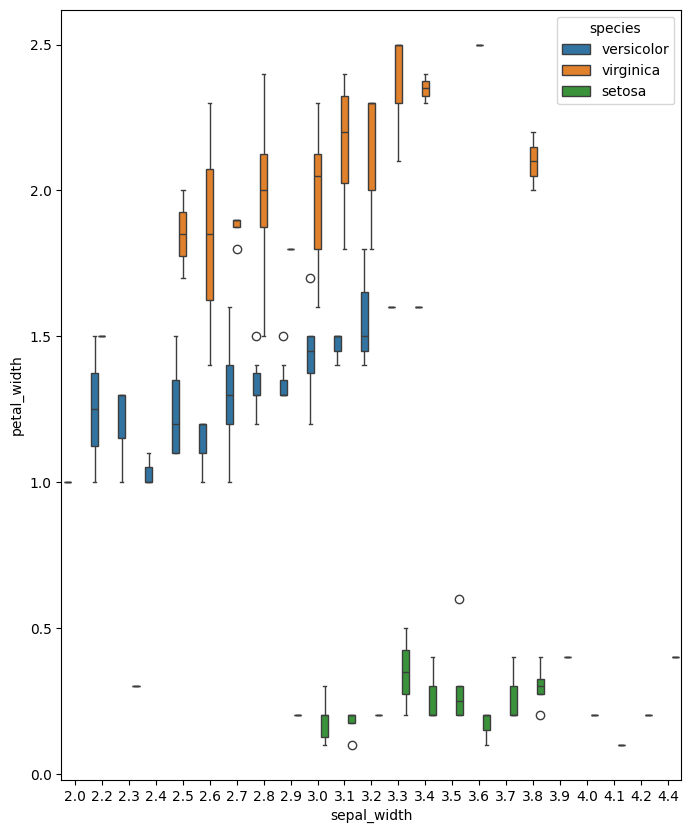

In [11]:
plt.figure(figsize=(8,10))
sns.boxplot(data=iris,
            x='sepal_width',
            y='petal_width',
            hue='species')

In [14]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

From this histogram, we can see that the average sepal is between 5.5 and 7 in length.

In [23]:
fig = px.histogram(iris,
                   x='sepal_length',
                   y='petal_length',
                   nbins=30)
fig.update_layout(bargap=0.2)
fig.show()

## Data Cleaning

Not much cleaning was needed for this dataset, no outliers, no NaN values

In [ ]:
iris.dtypes

,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,object


In [ ]:
iris.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


## EDA

<Axes: xlabel='petal_length', ylabel='petal_width'>

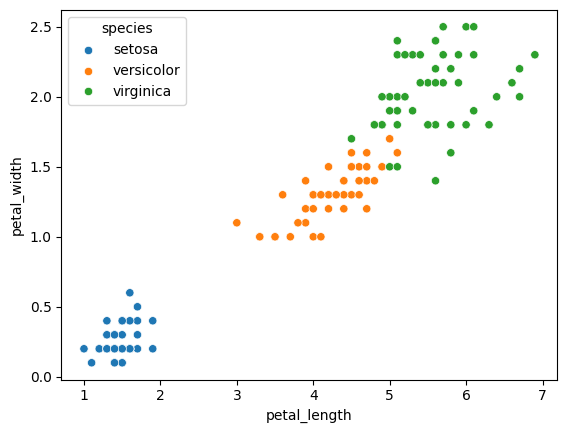

In [ ]:
sns.scatterplot(data = iris ,
                x = 'petal_length',
                y = 'petal_width',
                hue= 'species')

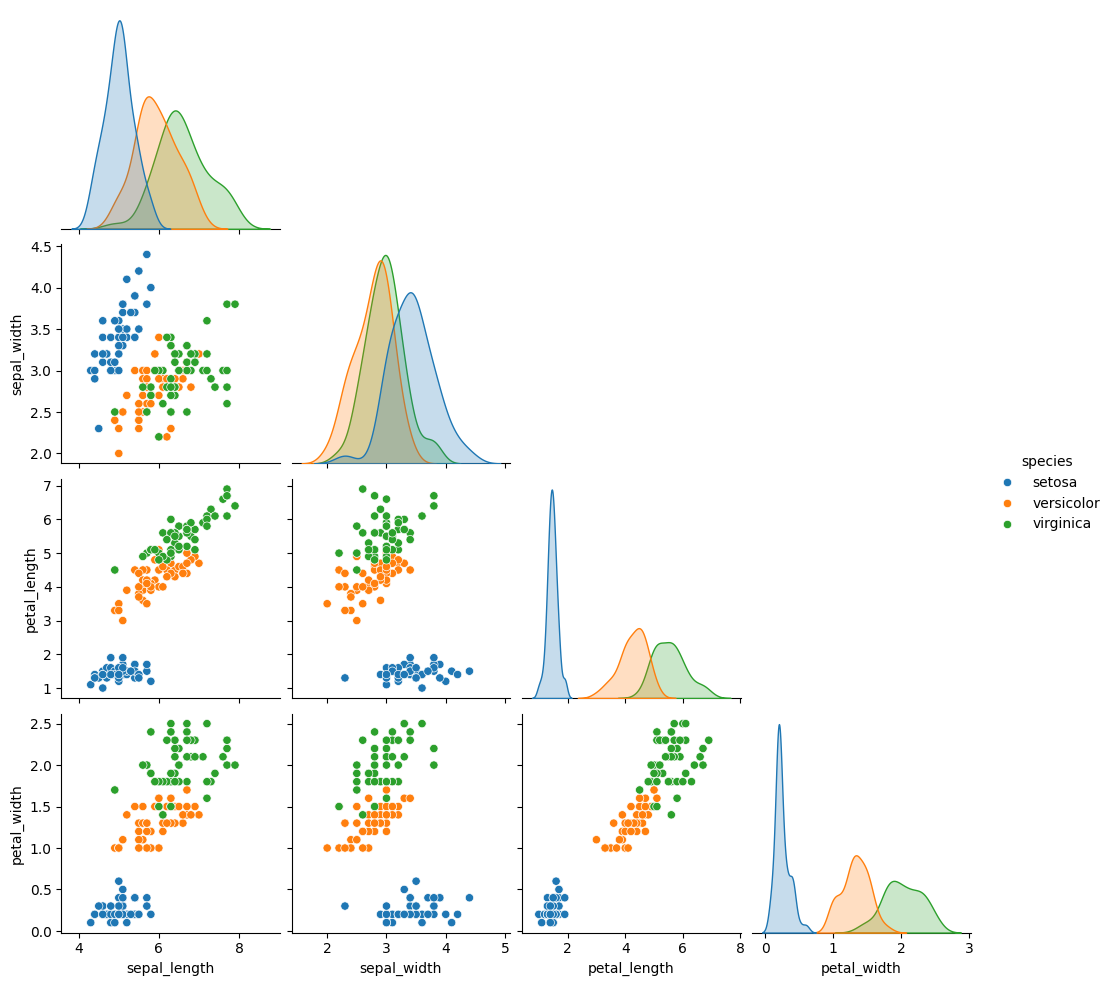

In [ ]:
sns.pairplot(data=iris,
             corner=True,
             hue= 'species',)

In [ ]:
px.scatter_3d(data_frame= iris,
              x = 'sepal_length',
              y = 'sepal_width',
              z = 'petal_width',
              color = 'species')

In [28]:
iris.dtypes

,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,object


In [25]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## Model

<Axes: >

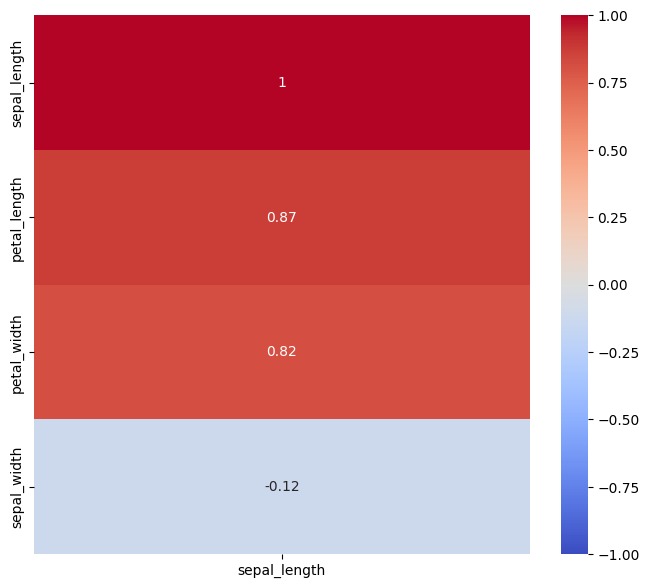

In [30]:
plt.figure(figsize=(8,7))
sns.heatmap(iris.corr(numeric_only = True)['sepal_length'].sort_values(ascending = False).to_frame(),
            vmin = -1,
            vmax = 1,
            annot = True,
            cmap = 'coolwarm')

In [31]:
X = iris[['petal_width','petal_length']]
y = iris['sepal_length']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [34]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

models = {
    'KNeighborsRegressor': KNeighborsRegressor(),
    'HistGradientBoostingRegressor': HistGradientBoostingRegressor(),
    'RandomForestRegressor': RandomForestRegressor()
}

scores = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    scores[name] = {'train_score': train_score, 'test_score': test_score}
    print(f"{name}:")
    print(f"  Training Accuracy Score: {train_score:.4f}")
    print(f"  Testing Accuracy Score: {test_score:.4f}")
    print("\n")

KNeighborsRegressor:
  Training Accuracy Score: 0.8508
  Testing Accuracy Score: 0.8275


HistGradientBoostingRegressor:
  Training Accuracy Score: 0.8093
  Testing Accuracy Score: 0.7446


RandomForestRegressor:
  Training Accuracy Score: 0.9390
  Testing Accuracy Score: 0.7710




## Final Model

In [37]:
X = iris[['petal_width','petal_length']]
y = iris['sepal_length']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [39]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [41]:
rf = RandomForestRegressor()

In [42]:
rf.fit(X_train_sc,y_train)

RandomForestRegressor()

In [43]:
# Training accuracy score
rf.score(X_train_sc, y_train)

0.9409614921850139

In [44]:
# Testing accuracy score
rf.score(X_test_sc,y_test)

0.7485216485465832

## Pickle

In [45]:
EDA_iris_pkl_file = '/content/drive/MyDrive/Colab Notebooks/Coding_Labs/ Breast Cancer Classification / Lab Lesson/'

# Whatever you call it, you will use it on your docker file
eda_pickel = 'Eda_iris_pkl_file'

# opening your model
# change out 'lr' for whatever you call your model
with open('EDA_iris_pkl_file', 'wb') as file:
    model = pickle.dump(rf, file)

# loading your model into google colab
# x1 = pickle.load('pkl_file')

# Use to open the Pickel file
# Change 'model' for whatever you call your model
# with open(model, 'rb') as file: